# Digit Recognizer

An introduction to classification with k-NN on the handwritten digits problem 

MNIST Data from [Kaggle](https://www.kaggle.com/c/digit-recognizer)

## 0. Import Libraries

In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## 1. Load and Format Datasets

In [2]:
path_to_file = '~/Desktop/DigitRecognizer/data/'
train = pd.read_csv(path_to_file+'train.csv')
test = pd.read_csv(path_to_file+'test.csv')

print 'Train Set Shape: {}'.format(train.shape)
print 'Test Set Shape: {}'.format(test.shape)

Train Set Shape: (42000, 785)
Test Set Shape: (28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separate the label from the feature vectors
train_y = train['label']
del train['label']

## 2. Visualize a Sample Image

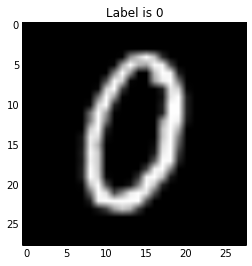

In [5]:
# Select a sample image 
sample_label = train_y[5]
sample_image = train.iloc[5]
pixels = np.array(sample_image, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {}'.format(sample_label))
plt.imshow(pixels, cmap='gray')
plt.show()

## 3. Model Selection

In [6]:
# Split data into hold-out set
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.2, random_state=42)

# Generate list of potential K values
k_list = range(1,11)

### For Loop Approach

In [ ]:
%%capture output

start = time.time()

print('k', 'Error Rate')
for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    err_rate = 1 - accuracy_score(y_test, preds)
    print(k, err_rate)
    
end = time.time()
run_time = float(end - start)/60
print '\nRun time: {:0.2f} minutes'.format(run_time)

In [ ]:
output.show()

### GridSearchCV Approach

In [ ]:
%%capture output

from sklearn.model_selection import GridSearchCV

start = time.time()

parameters = {'n_neighbors': k_list}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring='accuracy', refit=True)
clf.fit(X_train, y_train)

end = time.time()
run_time = float(end - start)/60

print 'Best K: {}'.format(clf.best_params_)
print 'Best GridSearchCV accuracy score: {}'.format(clf.best_score_)
print 'Run time: {:0.2f} minutes'.format(run_time)

In [ ]:
output.show()

## 5. Model Fitting and Predictions

In [ ]:
# Fit k-NN
# If we took the GridSearchCV approach, the classifier would already be fit to full train set,
# and we could skip to the prediction part.
k = 1
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(train, train_y)

In [ ]:
# Make predictions on test set
preds = clf.predict(test)

## 6. Export Results

In [ ]:
# Format submission, 1-indexed, column labels ImageId and Label
ImageId = np.array(range(1,len(preds)+1))
d = {'ImageId': ImageId, 'Label': preds}
df_preds = pd.DataFrame(d)
df_preds.head()

In [ ]:
sub_number = 1
df_preds.to_csv('submissions/submission{}.csv'.format(sub_number), index=False)